In [27]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import openai
import pandas as pd
from datetime import datetime

openai.api_key = ""

In [2]:
def json_to_dataframe(json_file):
    data = []
    with open(json_file, 'r') as file:
        for line in file:
            data.append(eval(line))  # Evaluate each line as a Python dictionary
    
    df = pd.DataFrame(data)
    return df

In [3]:
def get_embedding(text, model="text-embedding-ada-002"):
    if isinstance(text, str):  # If text is a string, replace "\n" with space
        text = text.replace("\n", " ")
    elif isinstance(text, list):  # If text is a list, handle each element separately
        text = [x.replace("\n", " ") for x in text]
    
    return openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']



def embed_summaries(df: pd.DataFrame, column_name: str) -> pd.Series:
    embeddings_series = df[column_name].apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))
    return embeddings_series

In [6]:
data_path = "/Users/maglionejuanmartin/code/reviews_clusterization_generative/data/Cell_Phones_and_Accessories_5 copy.json"

In [7]:
df = json_to_dataframe(data_path)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"
...,...,...,...,...,...,...,...,...,...
495,A34UVV757IKPVB,B0000ALPBP,justsomeguy,"[2, 4]",This item is useless. The plug is far too sma...,1.0,Won't fit. Useless.,1221609600,"09 17, 2008"
496,A2P5O5LIDLGKWT,B0000ALPBP,"Kathy ""Katgirl""","[0, 0]",This headset would not stay in my ear no matte...,2.0,Not too good.,1273968000,"05 16, 2010"
497,A2YBRSJPY12ZU5,B0000ALPBP,Lampjefe,"[0, 0]",It was liked so much that even when it broke t...,5.0,"Light weight, easy to use.",1403481600,"06 23, 2014"
498,A3JQ789K70O5O2,B0000ALPBP,love2craft,"[0, 0]",I purchased one of these headsets many years a...,5.0,Plantronics MX150 Flexible Boom Headset with 2...,1332460800,"03 23, 2012"


In [10]:
df["review_embeddings"] = embed_summaries(df,"reviewText")

## K Means

In [34]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_embeddings,Cluster
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014","[-0.02376340702176094, 0.0007739435532130301, ...",0
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014","[-0.0006393998046405613, 0.0023199100978672504...",4
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014","[-0.018102381378412247, 0.003998091910034418, ...",4
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013","[-0.00719756493344903, -0.012582746334373951, ...",0
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013","[-9.61226032814011e-05, -0.01164346095174551, ...",4
...,...,...,...,...,...,...,...,...,...,...,...
495,A34UVV757IKPVB,B0000ALPBP,justsomeguy,"[2, 4]",This item is useless. The plug is far too sma...,1.0,Won't fit. Useless.,1221609600,"09 17, 2008","[-0.012318800203502178, 0.008515594527125359, ...",5
496,A2P5O5LIDLGKWT,B0000ALPBP,"Kathy ""Katgirl""","[0, 0]",This headset would not stay in my ear no matte...,2.0,Not too good.,1273968000,"05 16, 2010","[-0.014710132963955402, 0.012600127607584, -0....",6
497,A2YBRSJPY12ZU5,B0000ALPBP,Lampjefe,"[0, 0]",It was liked so much that even when it broke t...,5.0,"Light weight, easy to use.",1403481600,"06 23, 2014","[-0.0020868279971182346, 0.0054012020118534565...",0
498,A3JQ789K70O5O2,B0000ALPBP,love2craft,"[0, 0]",I purchased one of these headsets many years a...,5.0,Plantronics MX150 Flexible Boom Headset with 2...,1332460800,"03 23, 2012","[-0.010593464598059654, 0.020756671205163002, ...",6


In [11]:
print(df["review_embeddings"])

0      [-0.02376340702176094, 0.0007739435532130301, ...
1      [-0.0006393998046405613, 0.0023199100978672504...
2      [-0.018102381378412247, 0.003998091910034418, ...
3      [-0.00719756493344903, -0.012582746334373951, ...
4      [-9.61226032814011e-05, -0.01164346095174551, ...
                             ...                        
495    [-0.012318800203502178, 0.008515594527125359, ...
496    [-0.014710132963955402, 0.012600127607584, -0....
497    [-0.0020868279971182346, 0.0054012020118534565...
498    [-0.010593464598059654, 0.020756671205163002, ...
499    [-0.0015895555261522532, 0.013137833215296268,...
Name: review_embeddings, Length: 500, dtype: object


In [12]:
matrix = np.vstack(df.review_embeddings.values)
matrix.shape

(500, 1536)

## Clustering

In [15]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

### Elbow Visualizer

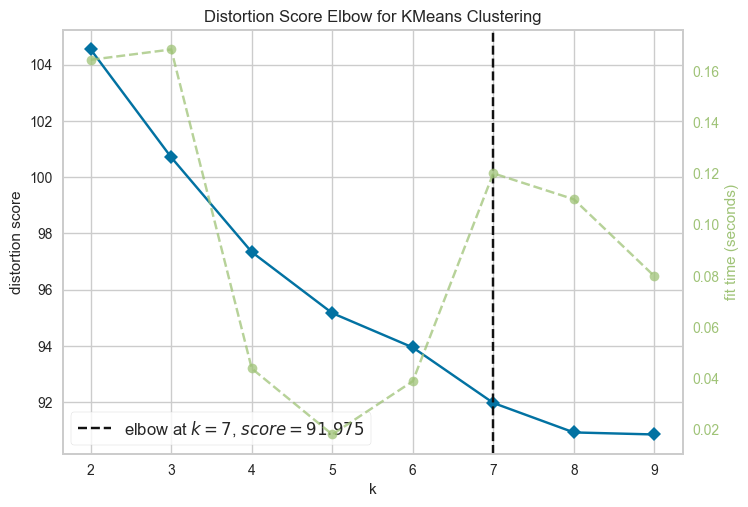

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2, 10))
visualizer.fit(matrix)
visualizer.show()

### Silhouette Visualuzer

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 2, figsize=(30, 60))
for i in range(2, 20):
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][mod])
    visualizer.fit(matrix)
    print("i value:", i, "Score:", visualizer.silhouette_score_ * 100)

In [22]:
# from sklearn.cluster import KMeans
n_cluster = 7
kmeans = KMeans(n_clusters=n_cluster, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

In [23]:
import openai

# Set the number of reviews per cluster
rev_per_cluster = 5

# Loop over each cluster
for i in range(n_cluster):
    # Pull out a sample of reviews from each cluster
    reviews = "\n".join(
        df[df.Cluster == i]
        .reviewText
        .sample(rev_per_cluster, random_state=42)
        .values
    )
    
    # Create a prompt for OpenAI to describe what's common in the reviews
    response = openai.ChatCompletion.create(
        model="gpt-4",   # update the model as per requirements
        messages=[
            {
                "role": "user",
                "content": f'What do the following customer reviews have in common? Give me the following: CATEGORY NAME and CATEGORY_DESCRIPTION about them\n\nCustomer reviews:\n"""\n{reviews}\n"""\n\nCATEGORY_NAME:\n\nCATEGORY_DESCRIPTION'
            }
        ],
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    # Fetch the generated response, assuming response would be the 'Category'
    category = response['choices'][0]['message']['content']

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)

    # Concatenate cluster's common details
    common_Details = " $ ".join([str(values) for values in sample_cluster_rows.reviewText.values])

    # Concatenate the cluster title, category name | If example reviews wanted to be shown, add {common_details}
    print(f"Cluster {i} | {category}")

    # Print a separator for each cluster
    print("-" * 100)

Cluster 0 | CATEGORY_NAME: 
Electronics Accessories

CATEGORY_DESCRIPTION: 
These reviews are about various accessories related to electronics such as phone cases, wires, and adhesive products. The customers are sharing their experiences regarding the functionality, durability, and design of these products.
----------------------------------------------------------------------------------------------------
Cluster 1 | CATEGORY_NAME: 
Phone Battery Reviews

CATEGORY_DESCRIPTION: 
These reviews are all related to customers' experiences with purchasing and using replacement batteries for their mobile devices, including iPhones and other smartphones. They discuss aspects such as the quality of the battery, the process of replacing the old battery, and the performance of the device after
----------------------------------------------------------------------------------------------------
Cluster 2 | CATEGORY_NAME: 
Car Phone Chargers

CATEGORY_DESCRIPTION: 
These reviews are about car phone 

## Plotting

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

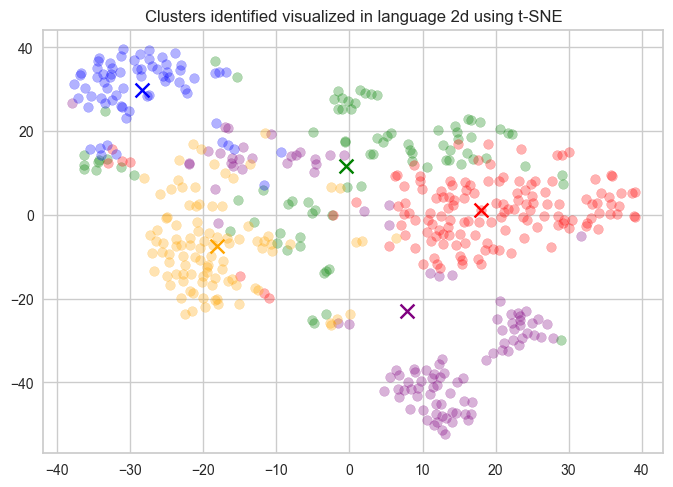

In [20]:
# Import necessary modules
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize the t-SNE model
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)

# Fit and transform the data using t-SNE algorithm, reduce the dimensionality to 2
vis_dims2 = tsne.fit_transform(matrix)

# Extract x and y coordinates of each point in the transformed 2D data
x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

# For each category (or cluster), plot the points and the cluster centroid
for category, color in enumerate(["purple", "green", "red", "blue", "orange"]):
    # Get x and y coordinates of points of current cluster
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    
    # Plot the points of the current cluster in the correlated color with some transparency
    plt.scatter(xs, ys, color=color, alpha=0.3)

    # Calculate the average x and y coordinates to place the centroid
    avg_x = xs.mean()
    avg_y = ys.mean()

    # Mark the cluster centroid with a cross marker
    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)

# Add title to the plot  
plt.title("Clusters identified visualized in language 2d using t-SNE")

## Exporting to xlsx

In [35]:
df = df.replace({r'\x1a': ''}, regex=True)

output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

current_time = datetime.now().strftime("%Y%m%d_%H%M%S")

filename = f"{output_dir}/output_{current_time}.xlsx"

df.to_excel(filename)